In [1]:
import warnings
import os
import sys


warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))
sys.path.append(parent_dir)

In [2]:
from src.main.models.logistic import Logistic
from src.main.utilities.utils import clean_text, stop_words_removal, stemming, tfidf_vectorizer, get_dataset
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
inputs, targets = get_dataset()

In [4]:
logistic = Logistic(verbose=False, multi_class="multinomial")

In [5]:
logistic.set_pipeline([clean_text, stop_words_removal, stemming, tfidf_vectorizer])
inputs = logistic.run_pipeline(inputs)

In [6]:
targets

2         Entertainment
17               Sports
20        Entertainment
21             Politics
24             Politics
              ...      
209513    Entertainment
209523           Sports
209524           Sports
209525           Sports
209526           Sports
Name: category, Length: 108238, dtype: object

In [16]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42, stratify=targets)


print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts())


category
Life             39.041460
Politics         29.475690
Entertainment    17.678716
Voices            9.772491
Sports            4.031643
Name: proportion, dtype: float64
category
Life             8452
Politics         6381
Entertainment    3827
Voices           2115
Sports            873
Name: count, dtype: int64


In [8]:
logistic.fit(x_train, y_train)

In [9]:
logistic.evaluate(x_test, y_test)

0.859109386548411

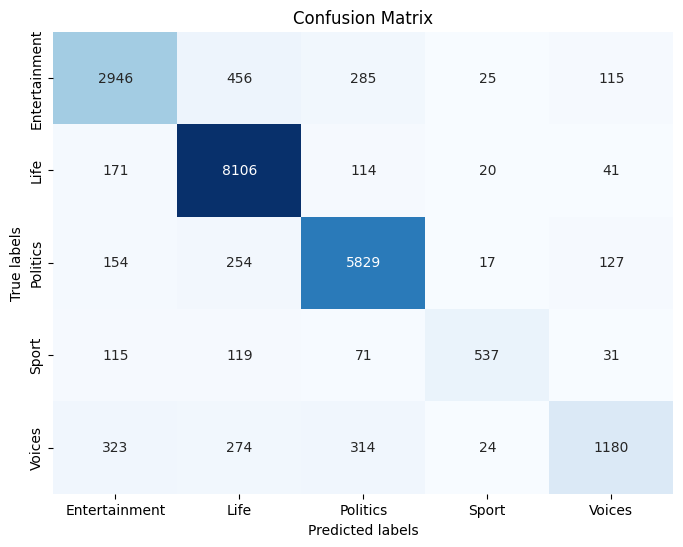

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = logistic.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Category names in order
categories = ['Entertainment', 'Life', 'Politics', 'Sport', 'Voices']

#confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()